In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
df = pd.read_csv("D:\Dataset\CIPLA.csv")

In [22]:
# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)
df = df[['Prev Close', 'Open', 'Low', 'Volume', 'High']]  # Select relevant columns


In [23]:
# Feature Scaling
sc = StandardScaler()
df_scaled = sc.fit_transform(df)


In [24]:
# Create features (X) and target (y)
X = df_scaled[:, :-1]
y = df_scaled[:, -1]

In [ ]:
#Below we devide into training set (60%), validation set (20%), and testing set (20%).

In [25]:
# Splitting Data into Training, Validation, and Testing Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [26]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [28]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_val, y_val))


Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.1413 - val_loss: 0.0027
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0019

In [29]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Data: {loss}')


Mean Squared Error on Test Data: 0.0011722211493179202


In [30]:
# Assuming your model is already trained and you have X_test and y_test
y_pred = model.predict(X_test)

34/34 [==============================] - 0s 2ms/step


In [31]:
# Create a new dataframe with columns 'Prev Close', 'Open', 'Low', 'Volume', 'High', 'Predicted High'
df_tested = pd.DataFrame({'Prev Close': X_test[:, 0],
                          'Open': X_test[:, 1],
                          'Low': X_test[:, 2],
                          'Volume': X_test[:, 3],
                          'High': y_test,
                          'Predicted High': y_pred.flatten()})


In [32]:
# Save the dataframe to a CSV file
df_tested.to_csv('tested_data.csv', index=False)

In [33]:
# Calculate Mean Bias Error (MBE)
mbe = sum(y_pred - y_test) / len(y_test)
print(f'Mean Bias Error (MBE): {mbe}')

Mean Bias Error (MBE): [ 0.38218285 -1.49879114 -0.15669078 ...  0.83497226 -1.12242689
 -0.1261885 ]


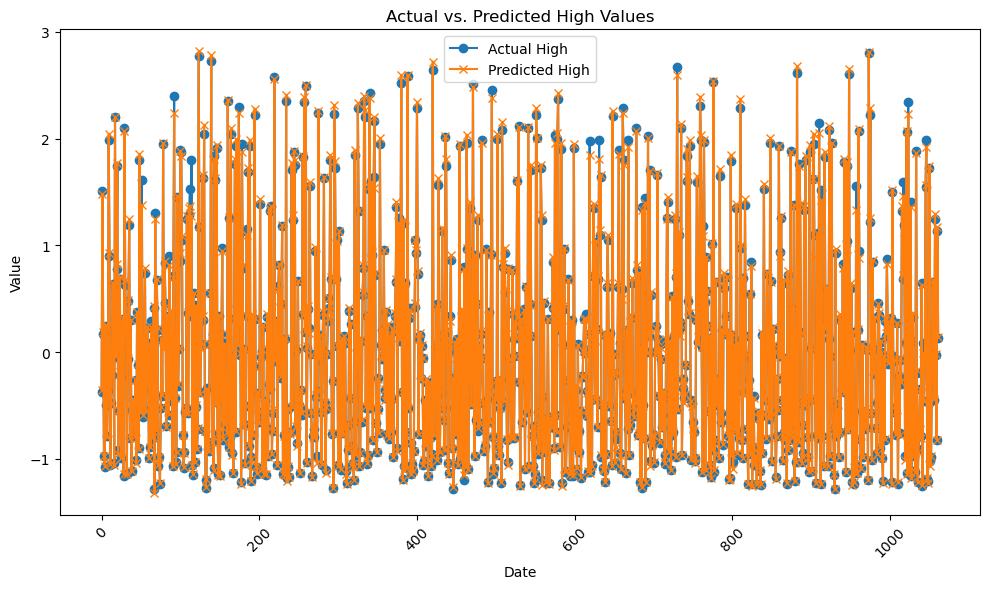

In [34]:
plt.figure(figsize=(10, 6))

plt.plot(df_tested.index, df_tested['High'], label='Actual High', marker='o')
plt.plot(df_tested.index, df_tested['Predicted High'], label='Predicted High', marker='x')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted High Values')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


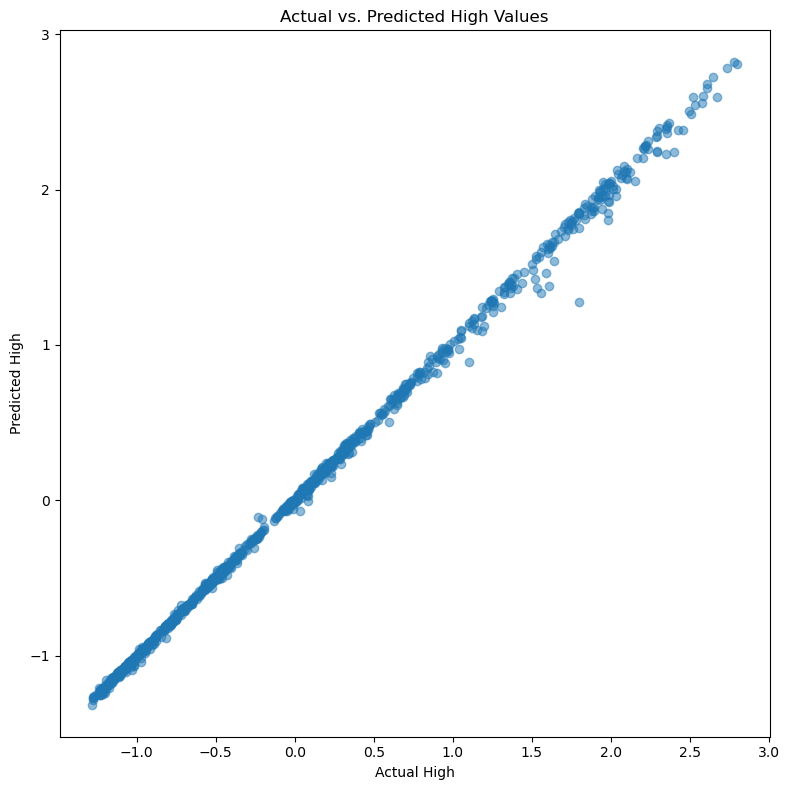

In [35]:
plt.figure(figsize=(8, 8))

plt.scatter(df_tested['High'], df_tested['Predicted High'], alpha=0.5)
plt.xlabel('Actual High')
plt.ylabel('Predicted High')
plt.title('Actual vs. Predicted High Values')

plt.tight_layout()
plt.show()


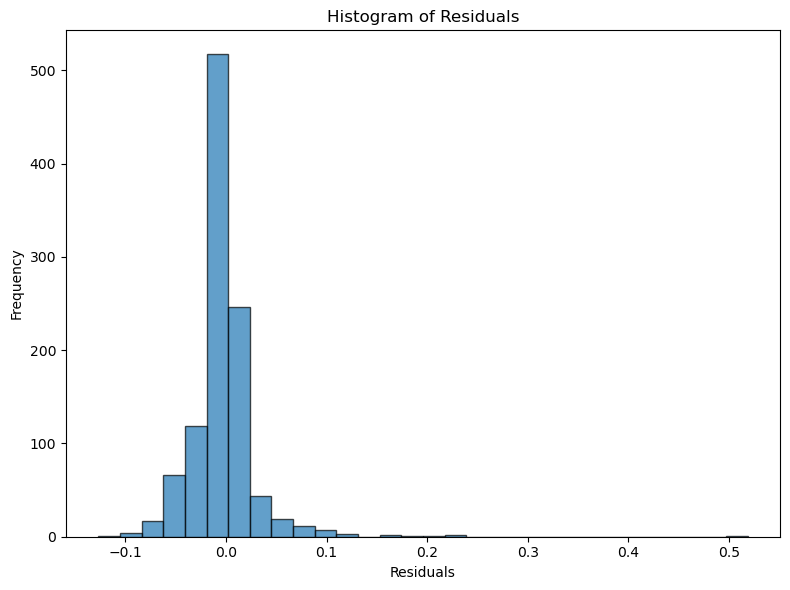

In [36]:
residuals = df_tested['High'] - df_tested['Predicted High']

plt.figure(figsize=(8, 6))

plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()


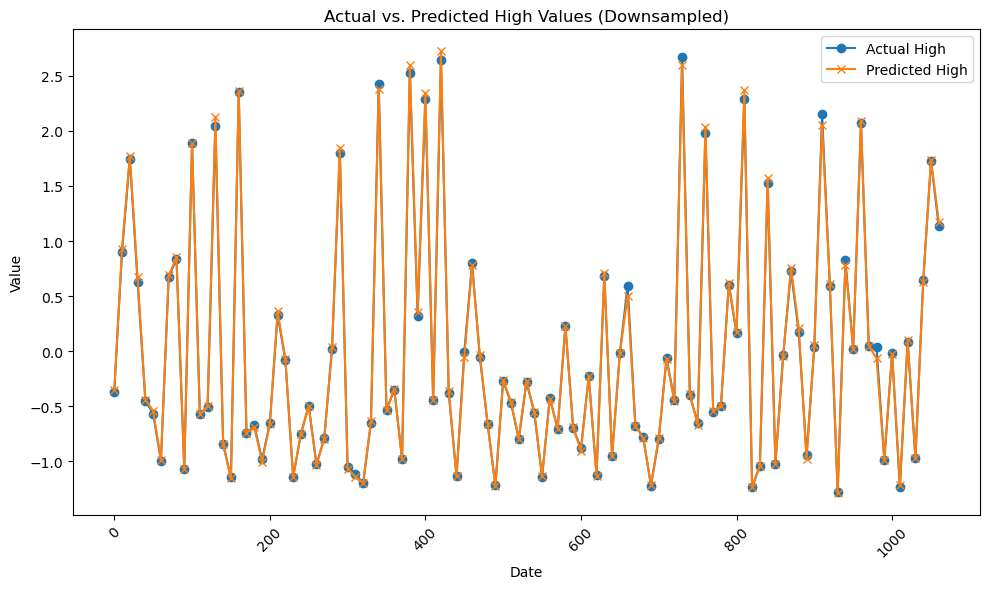

In [37]:
# Downsample the data to every 10th point for better visualization
df_tested_downsampled = df_tested.iloc[::10, :]

plt.figure(figsize=(10, 6))

plt.plot(df_tested_downsampled.index, df_tested_downsampled['High'], label='Actual High', marker='o')
plt.plot(df_tested_downsampled.index, df_tested_downsampled['Predicted High'], label='Predicted High', marker='x')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted High Values (Downsampled)')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [38]:
mbe_mean = np.mean(mbe)
print(f'Mean Bias Error (MBE): {mbe_mean}')

Mean Bias Error (MBE): 0.0030693010082227935
